In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from scipy import linalg
import matplotlib as mpl
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [39]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.15.1
astropy                       5.2.2
astunparse                    1.6.3
attrs                         23.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
beautifulsoup4                4.11.2
bleach                        6.0.0
blis                          0.7.9
blosc2                        2.0.0
bokeh                         2.4.3
branca                        0.6.0
CacheControl                  0.12.11
cached-property               1.5.2
cachetools                    5.3.0
cata

In [40]:
data = pd.read_csv('/content/data.csv')

In [41]:
#sample view of the data
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [42]:
data.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [43]:
#data overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [44]:
#targets distribution
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [45]:
#statistical overview of the data
data.describe().T

count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se                  569.0   40.337079   45.491006    6.802000   
smoothness_se            569.0    0.007041    0.003003    0.001713   
compactness_se           569.0    0.025478    0.017908    0.002252   
concavity_se             569.0    0.031894    0.030186    0.000000   
concave points_se        569.0    0.011796    0.006170    0.000000   
symmetry_se              569.0    0.020542    0.008266    0.007882   
fractal_dimension_se     569.0    0.003795    0.002646    0.000895   
radius_worst             569.0   16.269190    4.833242    7.930000   
texture_worst            569.0   25.677223    6.146258   12.020000   
perimeter_worst          569.0  107.261213   33.602542   50.410000   
area_worst               569.0  880.583128  569.356993  185.200000   
smoothness_worst         569.0    0.132369    0.022832    0.071170   
compactness_worst        569.0    0.254265    0.157336    0.027290   
concavity_worst          569.0    0.272188    0.208624    0.000000   
concave points_worst     569.0    0.114606    0.065732    0.000000   
symmetry_worst           569.0    0.290076    0.061867    0.156500   
fractal_dimension_worst  569.0    0.083946    0.018061    0.055040   

                                25%         50%          75%         max  
radius_mean               11.700000   13.370000    15.780000    28.11000  
texture_mean              16.170000   18.840000    21.800000    39.28000  
perimeter_mean            75.170000   86.240000   104.100000   188.50000  
area_mean                420.300000  551.100000   782.700000  2501.00000  
smoothness_mean            0.086370    0.095870     0.105300     0.16340  
compactness_mean           0.064920    0.092630     0.130400     0.34540  
concavity_mean             0.029560    0.061540     0.130700     0.42680  
concave points_mean        0.020310    0.033500     0.074000     0.20120  
symmetry_mean              0.161900    0.179200     0.195700     0.30400  
fractal_dimension_mean     0.057700    0.061540     0.066120     0.09744  
radius_se                  0.232400    0.324200     0.478900     2.87300  
texture_se                 0.833900    1.108000     1.474000     4.88500  
perimeter_se               1.606000    2.287000     3.357000    21.98000  
area_se                   17.850000   24.530000    45.190000   542.20000  
smoothness_se              0.005169    0.006380     0.008146     0.03113  
compactness_se             0.013080    0.020450     0.032450     0.13540  
concavity_se               0.015090    0.025890     0.042050     0.39600  
concave points_se          0.007638    0.010930     0.014710     0.05279  
symmetry_se                0.015160    0.018730     0.023480     0.07895  
fractal_dimension_se       0.002248    0.003187     0.004558     0.02984  
radius_worst              13.010000   14.970000    18.790000    36.04000  
texture_worst             21.080000   25.410000    29.720000    49.54000  
perimeter_worst           84.110000   97.660000   125.400000   251.20000  
area_worst               515.300000  686.500000  1084.

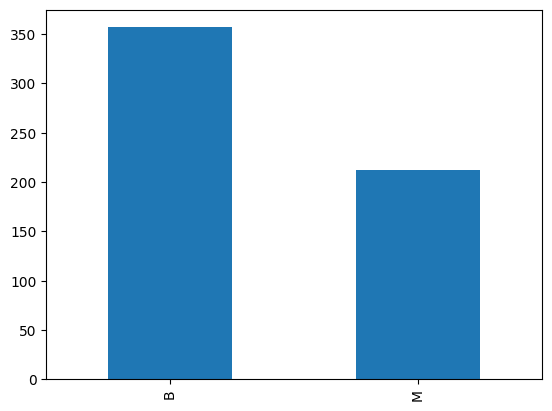

In [46]:
#targets distribution
data['diagnosis'].value_counts().plot.bar()
plt.show()

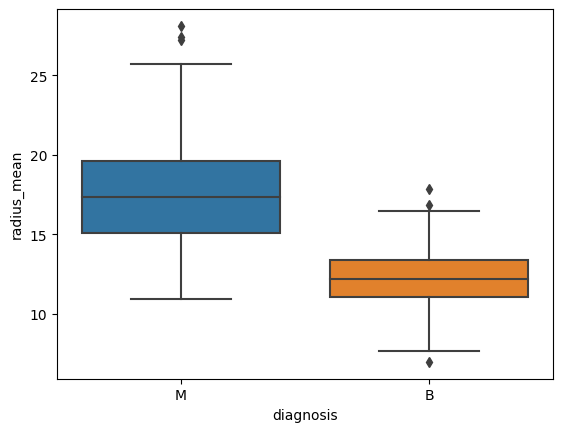

In [47]:
sns.boxplot(y='radius_mean',x='diagnosis',
            data=data)
plt.show()

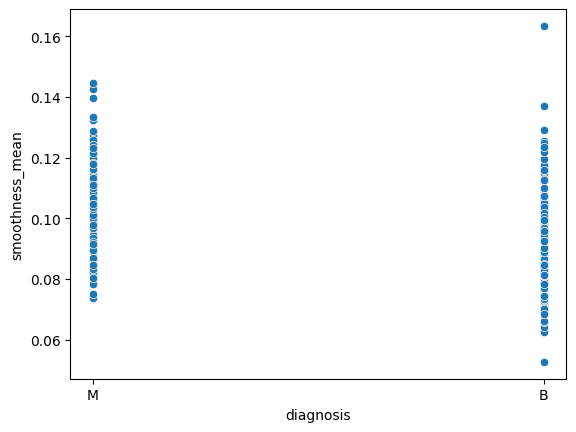

In [48]:
sns.scatterplot(y='smoothness_mean',x='diagnosis',data=data)
plt.show()

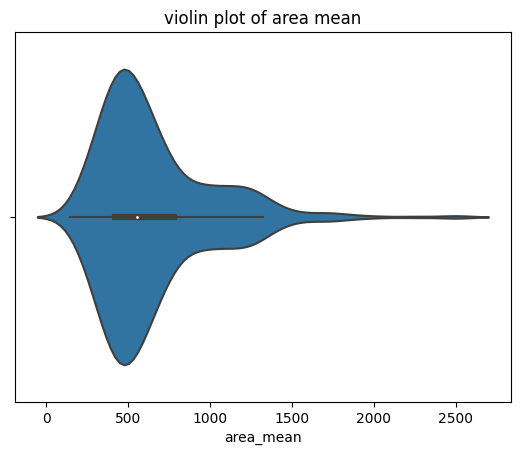

In [49]:
sns.violinplot(x='area_mean',data=data)
plt.title('violin plot of area mean')
plt.show()

In [50]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [51]:
#slicing the dataset with mean values
data_mean = data.iloc[:,0:12]
data_mean

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  fractal_dimension_mean  radius_se  
0           0.2419                 0.07871     1.0950  
1           0.1812                 0.05667     0.5435  
2           0.2069                 0.05999     0.7456  
3           0.2597                 0.09744     0.4956  
4           0.1809                 0.05883     0.7572  
..             ...                     ...        ...  
564         0.1726                 0.05623     1.1760  
565         0.1752                 0.05533     0.7655  
566         0.1590                 0.05648     0.4564  
567         0.2397                 0.07016     0.7260  
568         0.1587                 0.05884     0.3857  

[569 rows x 12 columns]

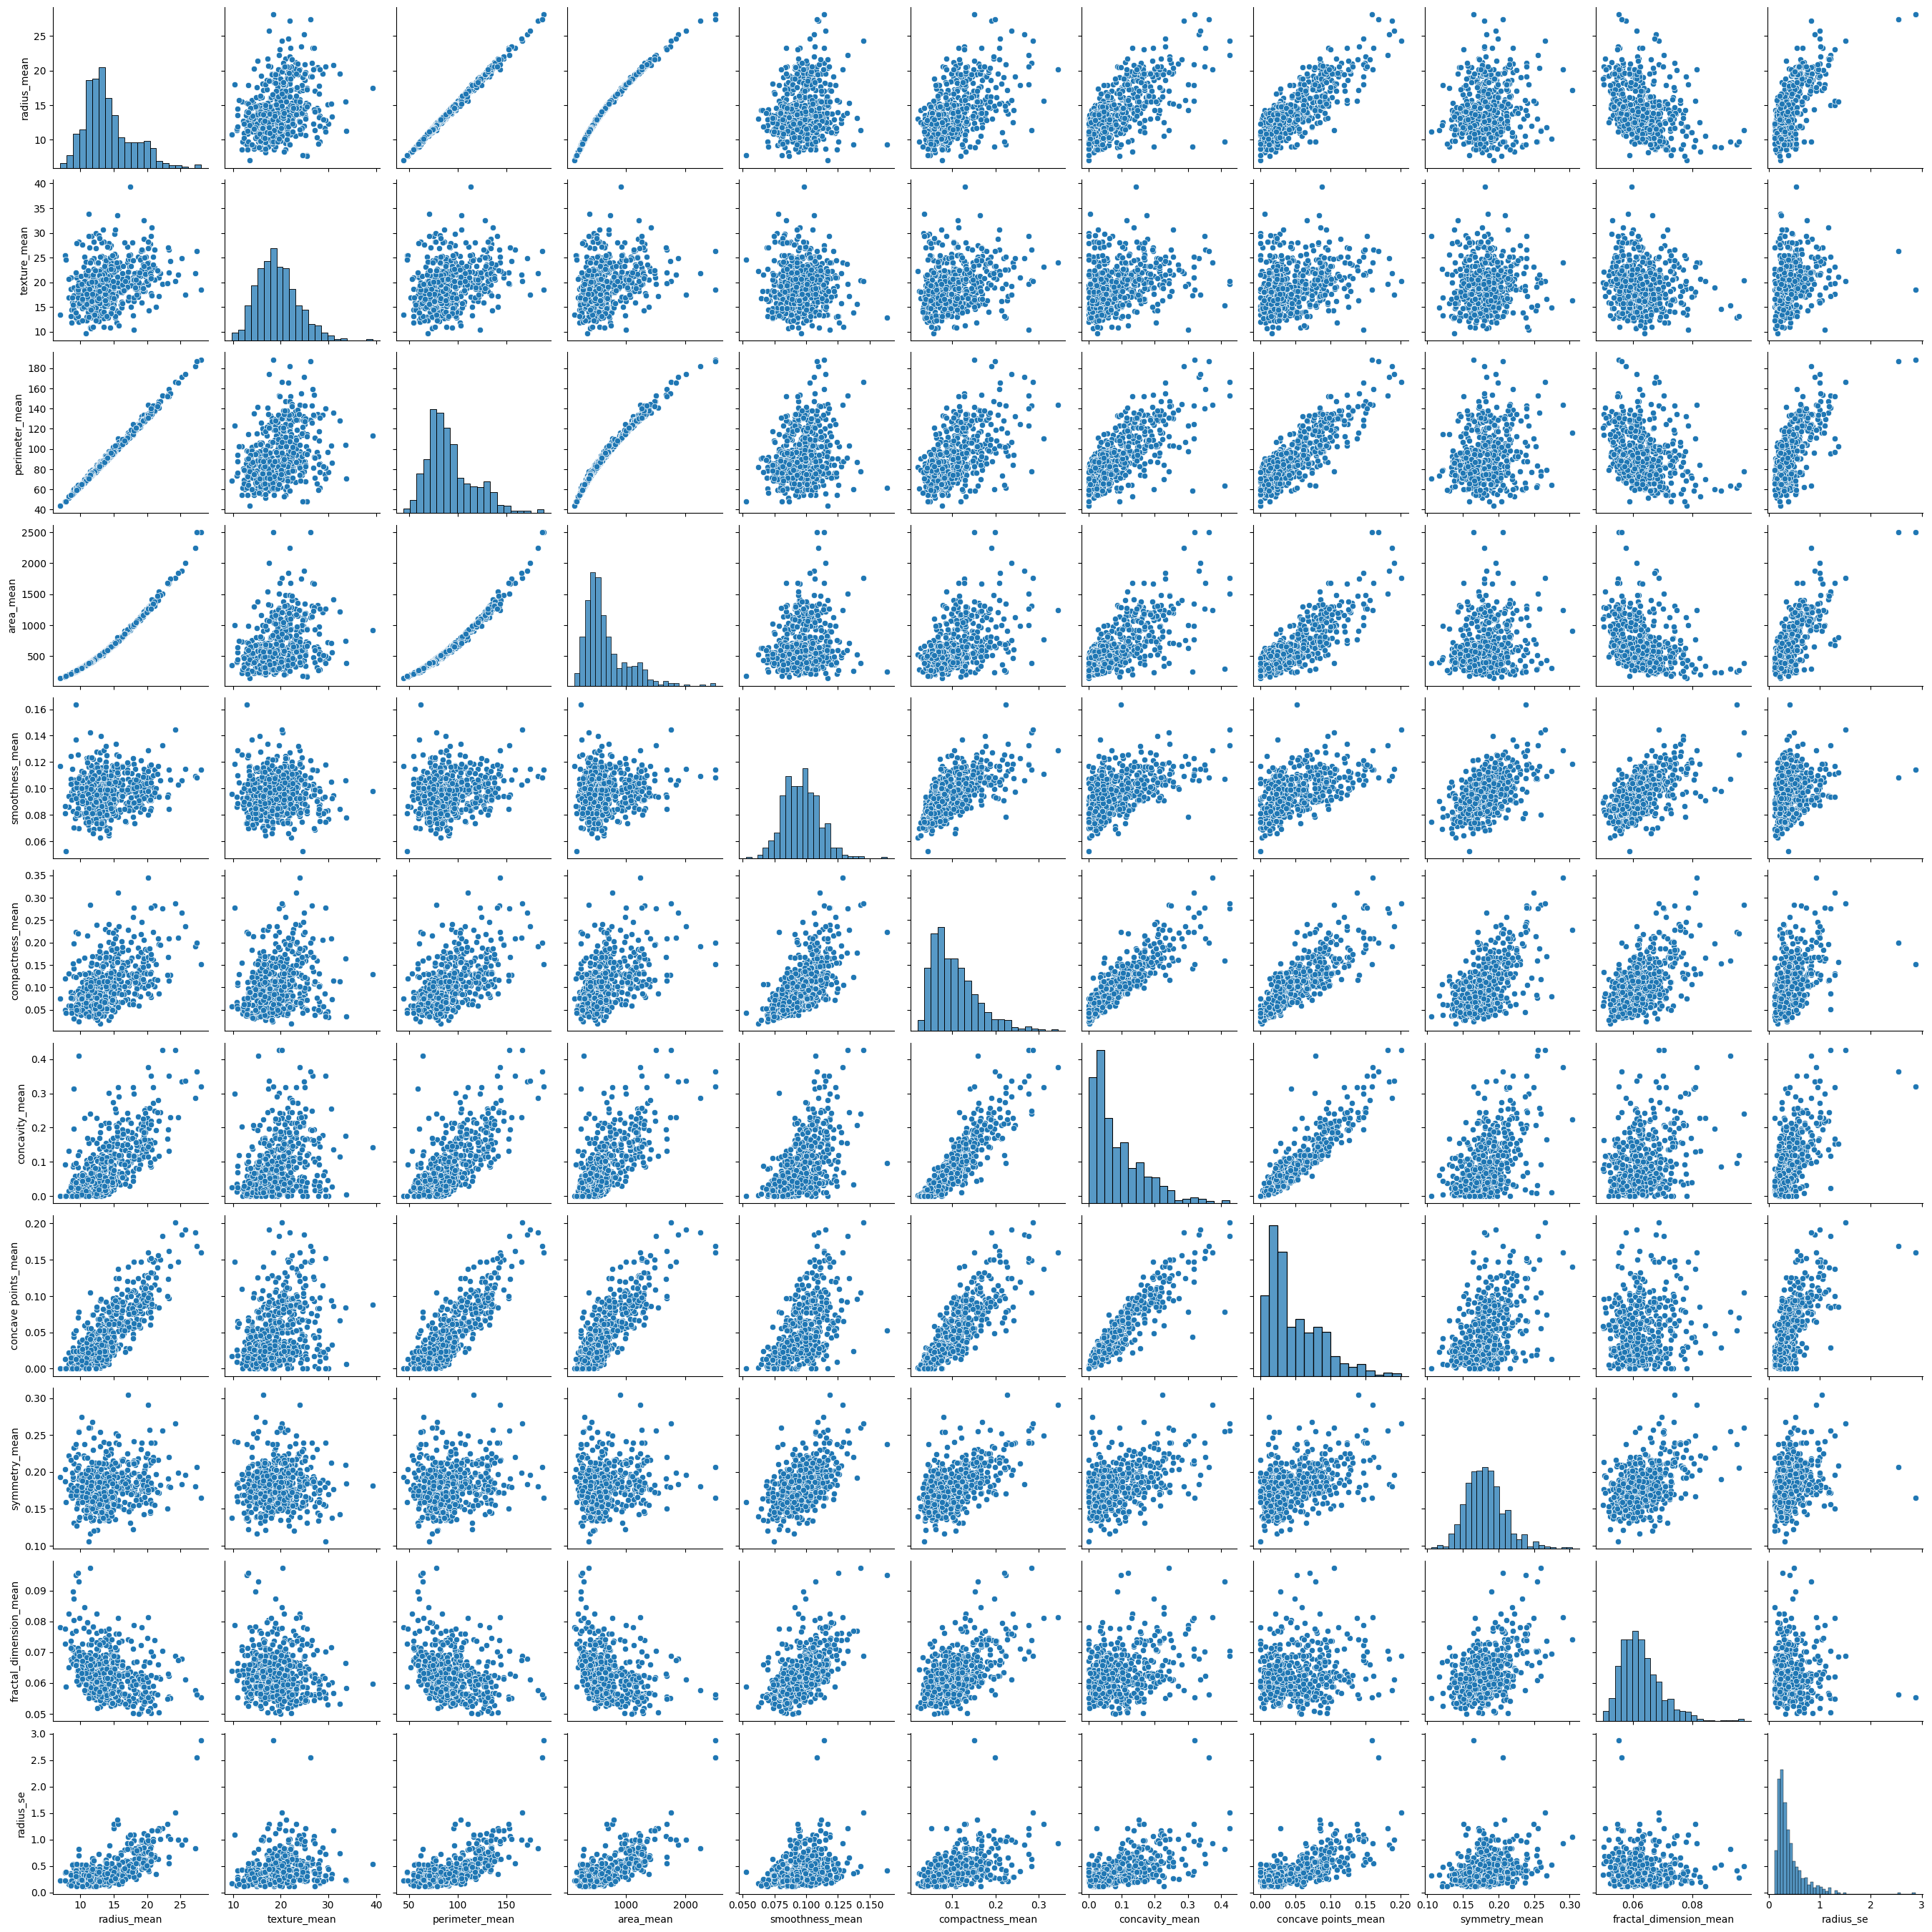

In [53]:
sns.pairplot(data=data_mean)
plt.show()

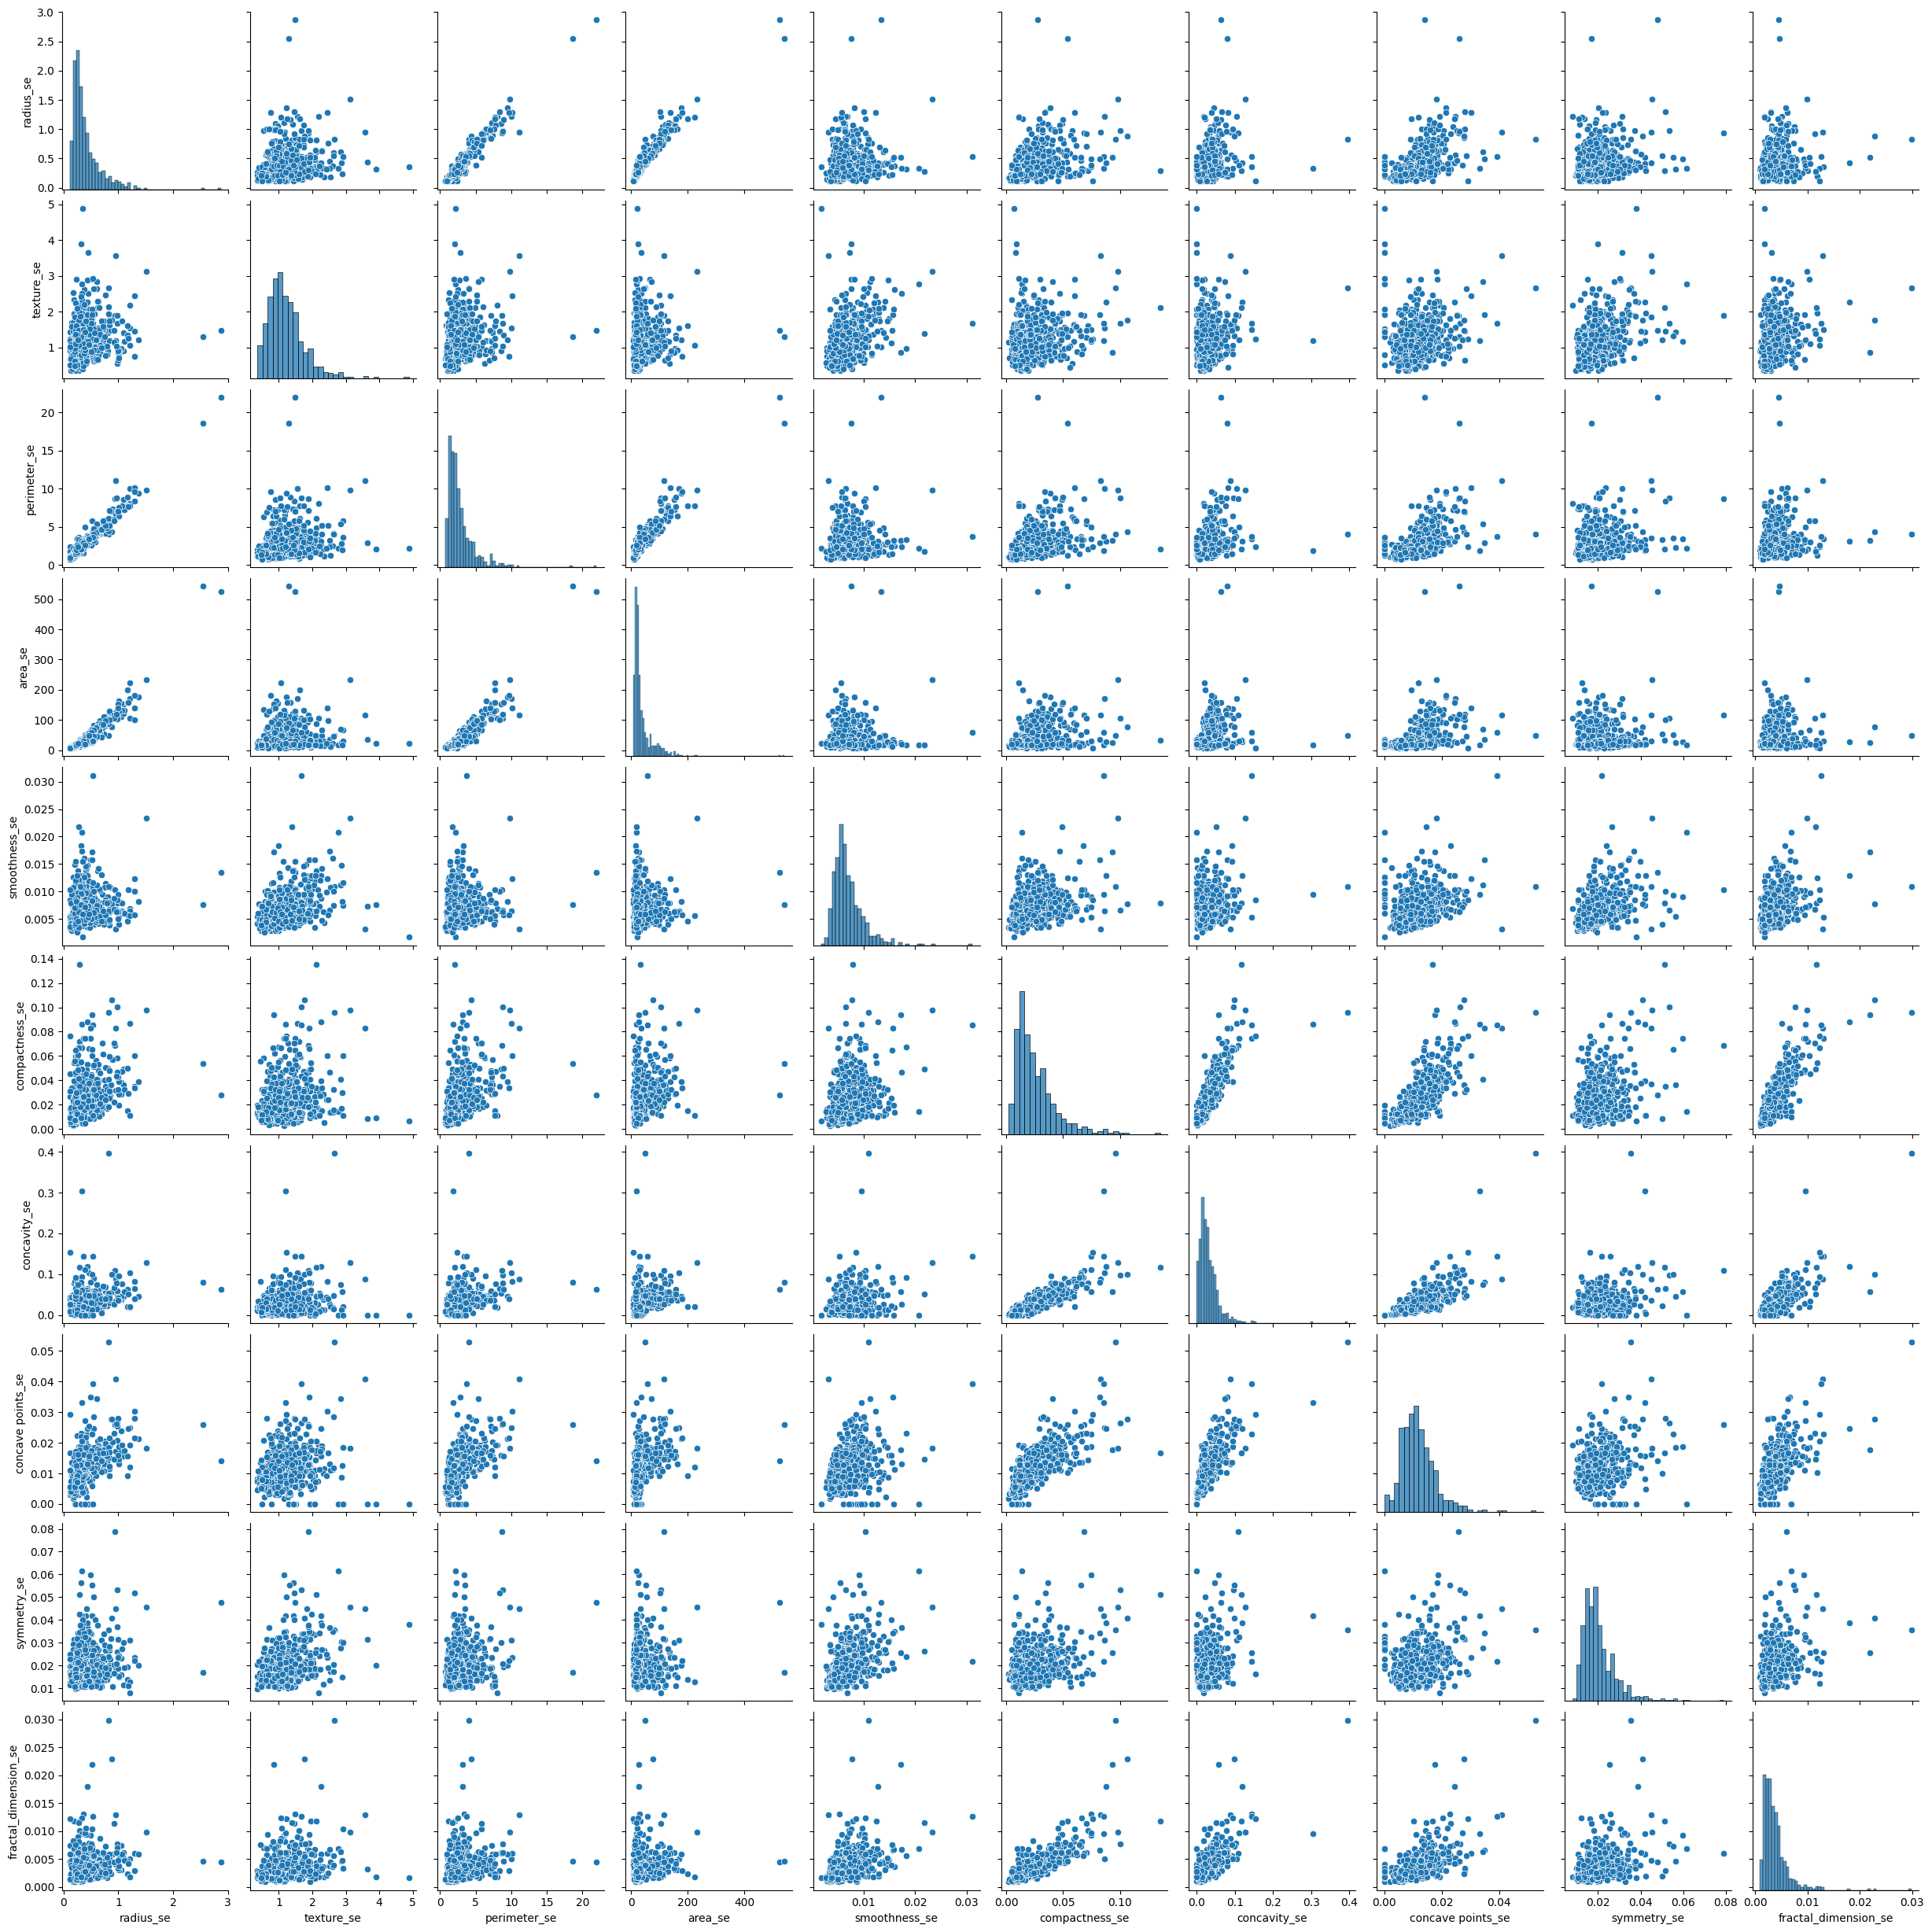

In [54]:
#slicing the dataset into se values
data_se = data.iloc[:,11:21]
sns.pairplot(data=data_se)
plt.show()

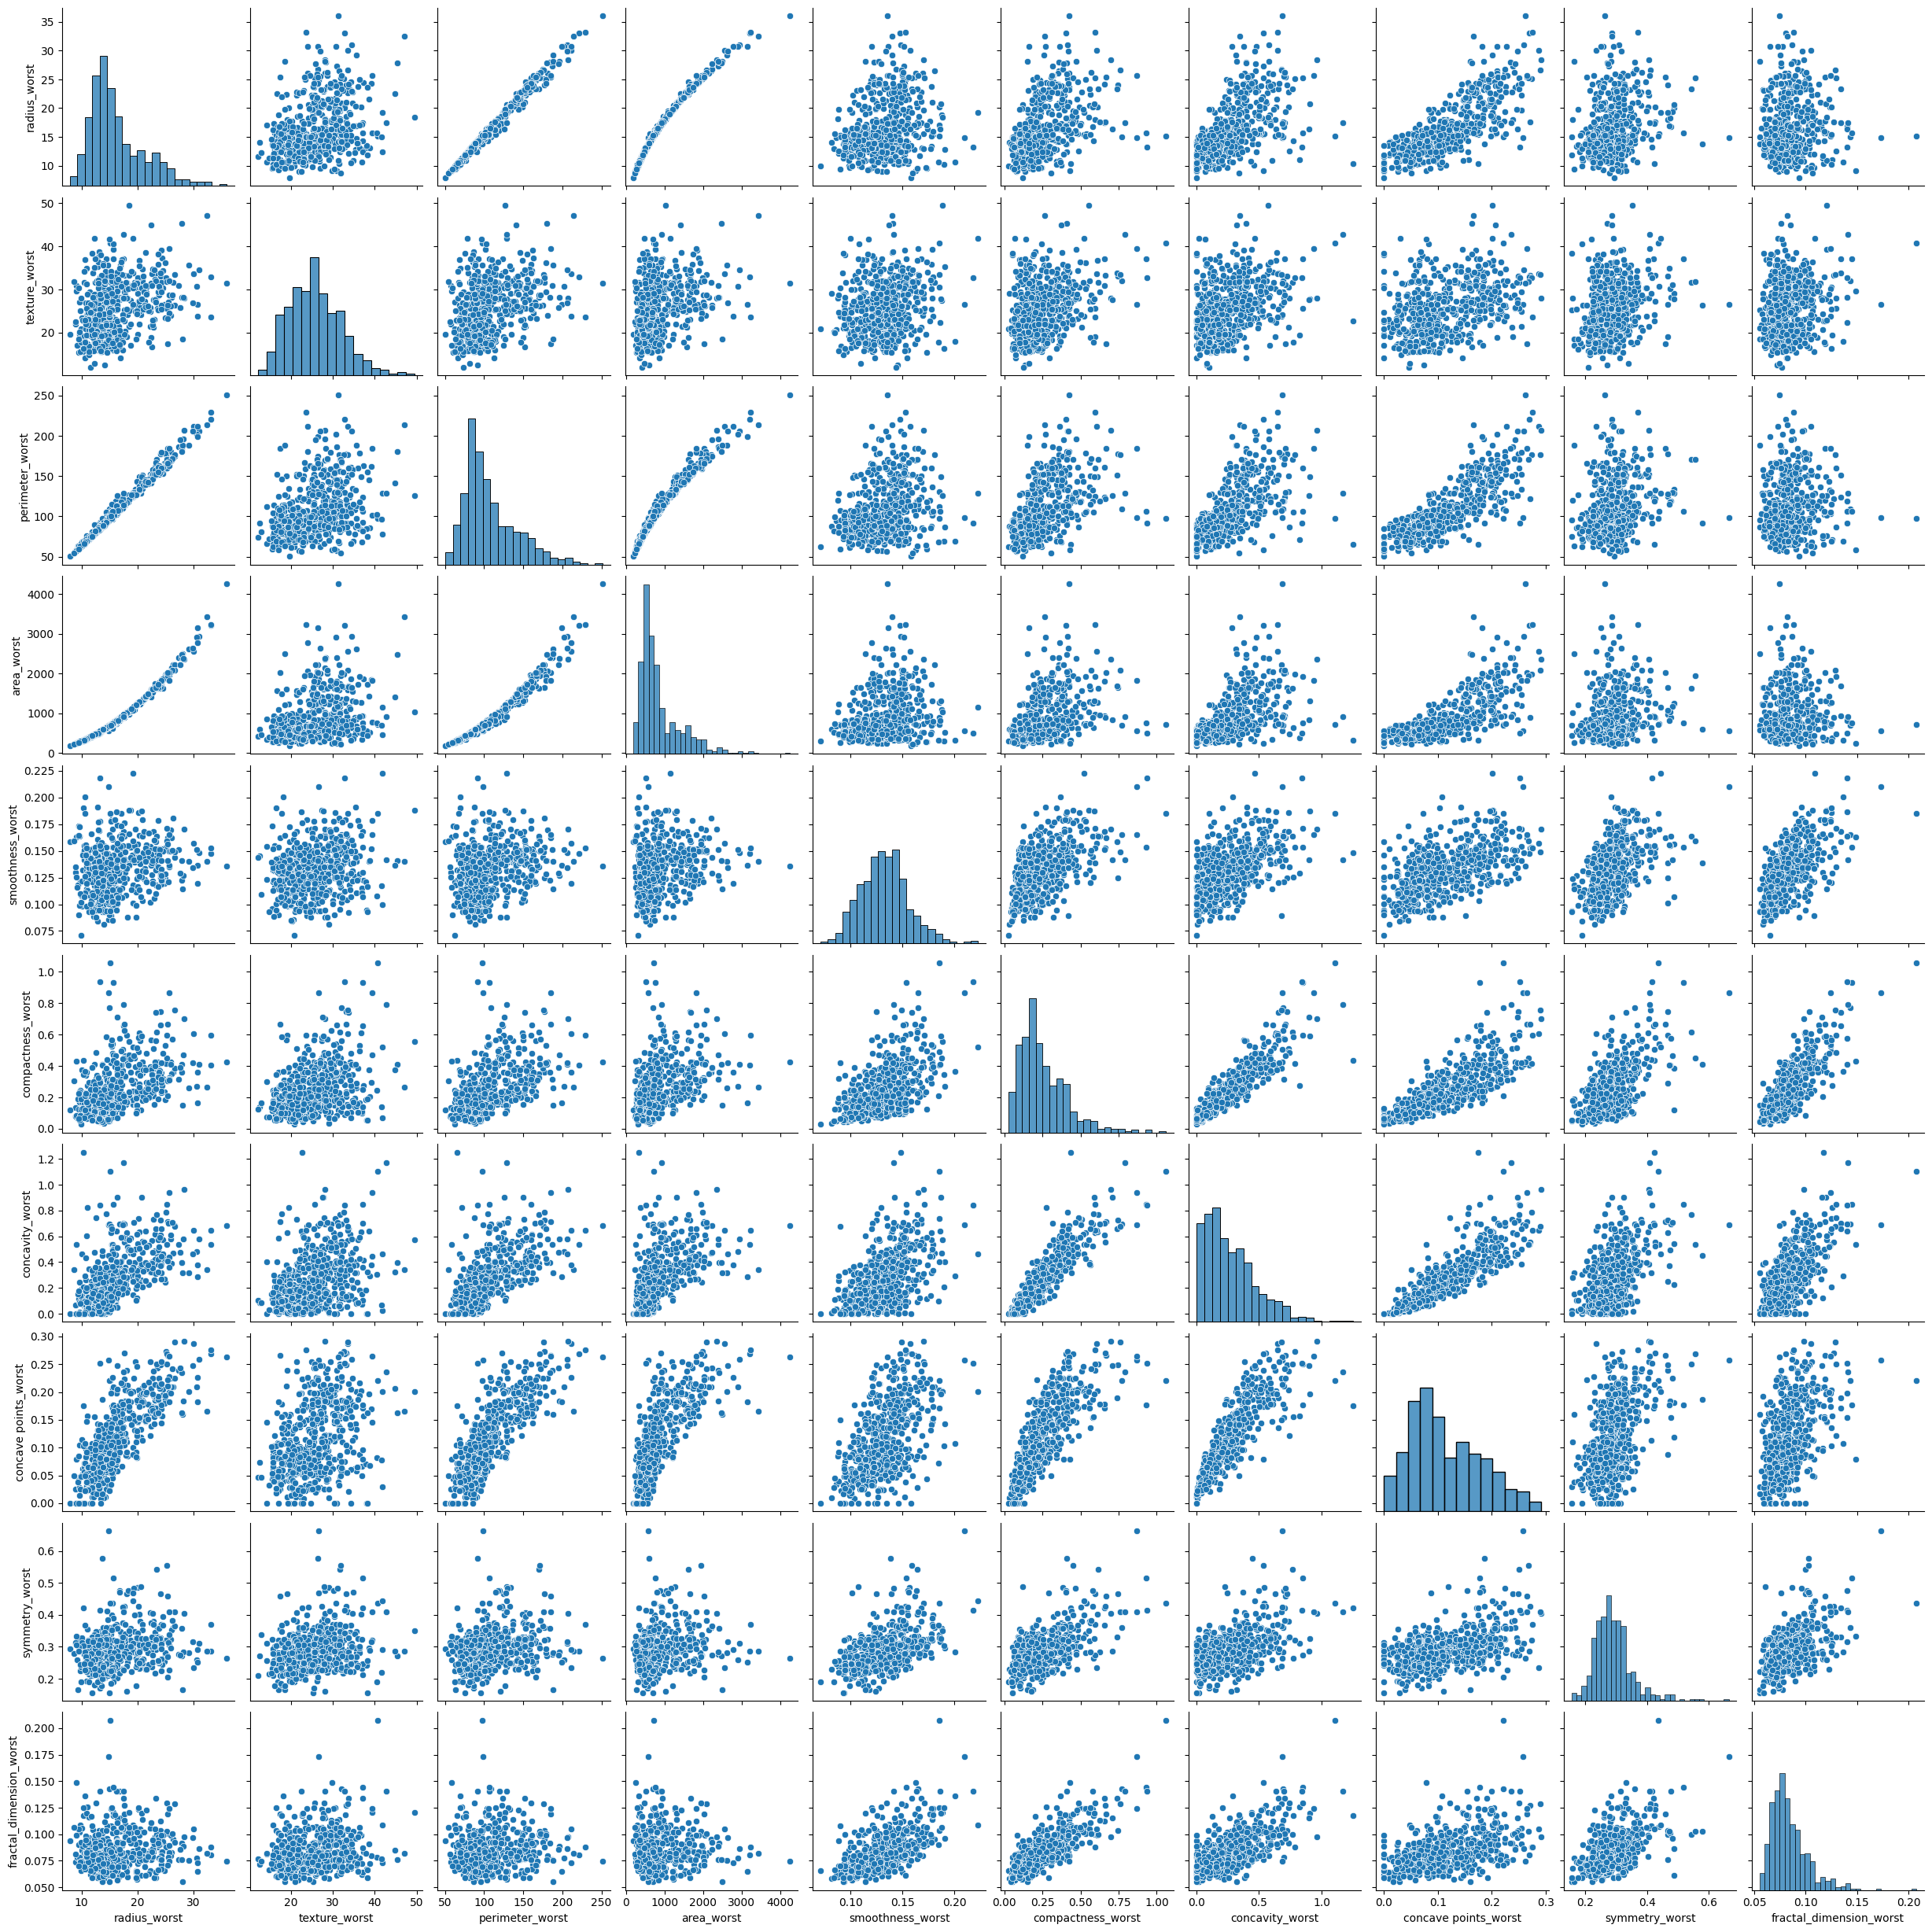

In [55]:
#slicing the data with worst parameters
data_worst = data.iloc[:,21:]
sns.pairplot(data=data_worst)
plt.show()

<ipython-input-57-a714657ce2a8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


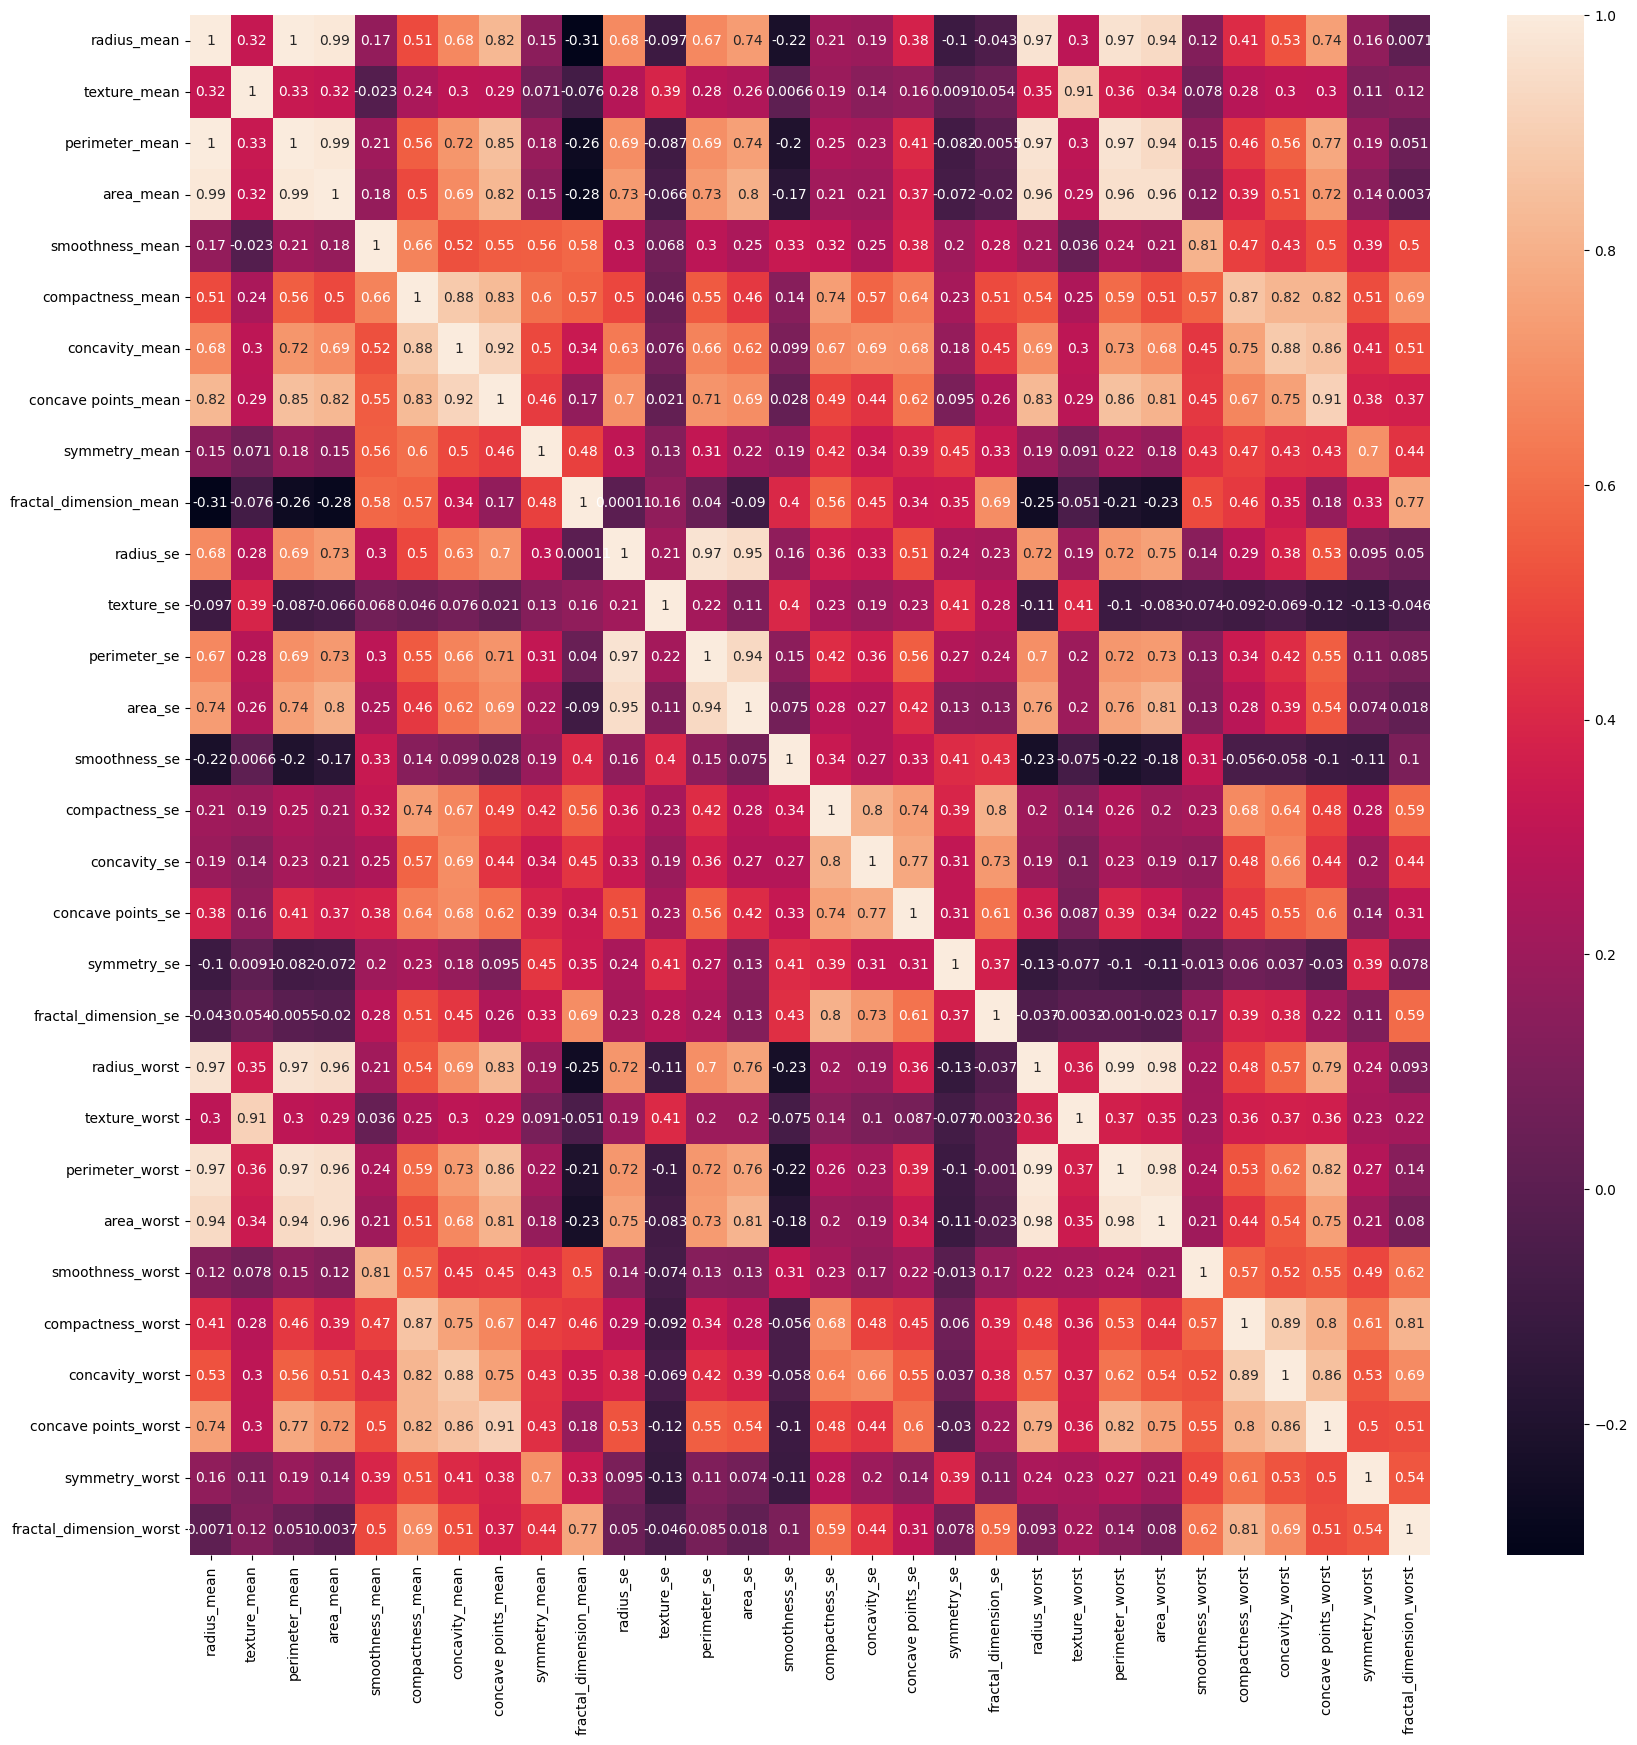

In [57]:
#correlation plot
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [58]:
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])

In [59]:
#seperating features and targets
X = data.drop('diagnosis',axis=1)
y = data['diagnosis']


#splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [60]:
#base line model
baseline_model = SVC()
baseline_model.fit(X_train,y_train)


SVC()

In [61]:
#baseline model predictions
base_preds = baseline_model.predict(X_test)

In [62]:
print(classification_report(base_preds,y_test))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       114
           1       0.83      0.93      0.88        57

    accuracy                           0.91       171
   macro avg       0.90      0.92      0.90       171
weighted avg       0.92      0.91      0.91       171



In [63]:

#initializing the LDA object and choosing the components
lda = LinearDiscriminantAnalysis(n_components=1)
qda = QuadraticDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train,y_train)
X_test_lda = lda.transform(X_test)
# Print the shape of the original data and the transformed data
print("Original Data shape:",X.shape, "\nModified Data shape:", X_train.shape)

Original Data shape: (569, 30) 
Modified Data shape: (398, 30)


In [64]:
#base model
model = SVC()
model.fit(X_train_lda,y_train)

SVC()

In [65]:
#predictions
preds = model.predict(X_test_lda)

In [66]:
#classification report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       107
           1       0.97      0.92      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



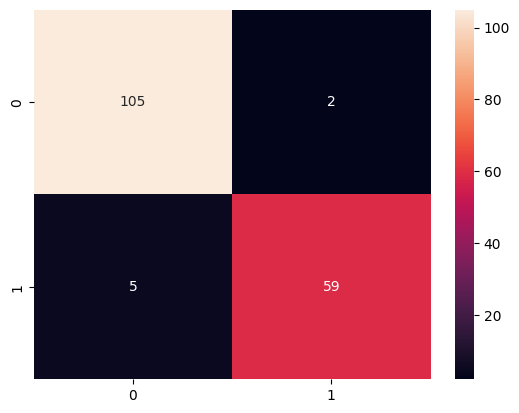

In [67]:
#confusion matrix
sns.heatmap(confusion_matrix(y_test,preds),annot=True,fmt='g')
plt.show()

In [68]:
qda = QuadraticDiscriminantAnalysis()
# Training
qda.fit(X_train, y_train.ravel())
# Prediction
y_prob_qda = qda.predict_proba(X_test)[:, 1]
y_pred_qda = np.where(y_prob_qda > 0.5, 1, 0)

In [69]:
print(classification_report(y_test,y_pred_qda))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       107
           1       0.90      0.98      0.94        64

    accuracy                           0.95       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.96      0.95      0.95       171



In [70]:
confusion_matrix_qda = confusion_matrix(y_test, y_pred_qda)
false_positive_rate_qda, true_positive_rate_qda, thresholds = roc_curve(
    y_test, y_prob_qda
    )
roc_auc_qda = auc(false_positive_rate_qda, true_positive_rate_qda)


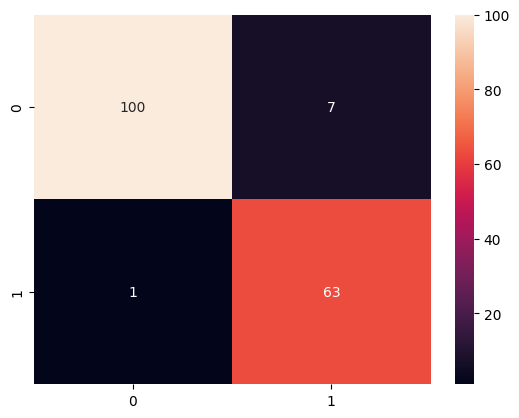

In [74]:
#confusion matrix
sns.heatmap(confusion_matrix_qda,annot=True,fmt='g')
plt.show()

In [72]:
def plot_roc(roc_auc, false_positive_rate, true_positive_rate):
  plt.figure(figsize=(6, 6))
  plt.title('Receiver Operating Characteristics')
  plt.plot(false_positive_rate, true_positive_rate, color='red', label='AUC = {:.2f}'.format( roc_auc))
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1], linestyle='--')
  plt.axis('tight')
  plt.ylabel('True Positive Rtae')
  plt.xlabel('False Positive Rtae')

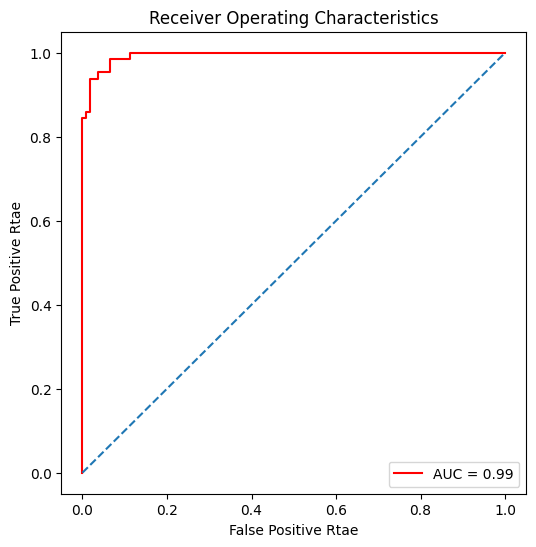

In [73]:
plot_roc(roc_auc_qda, false_positive_rate_qda, true_positive_rate_qda)